In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multi_optim import *

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [4]:
mobile_data = pd.read_csv("mobile_data (1).csv",index_col=False)
rating = mobile_data["Rating"].to_numpy()

for column in mobile_data.columns:
    mobile_data[column] = mobile_data[column]  / mobile_data[column].abs().max()



In [5]:
X = mobile_data.to_numpy().T[1:-1]
X = X.T
Y = np.ones(np.shape(X)[0])
X = np.insert(X, 0, Y, axis = 1)
X = X.T

X_train, X_test, y_train, y_test = train_test_split(X.T, rating, test_size=0.2, random_state = 56)
X_train, X_test = X_train.T, X_test.T

weight = np.ones(np.shape(X)[0])


In [6]:
def J(X,Y,W):
    data = (np.matmul(W,X)-Y)**2
    return 1/(2*np.shape(X)[1])*np.sum(data)

def dJ(X,Y,W):
    grad=[]
    for i in range(np.shape(X)[0]):
        data = np.multiply(np.matmul(W,X)-Y,X[i])
        grad += [sum(data)]
    grad = np.array(grad)
    return 1/np.shape(X)[1]*grad

In [7]:
tolerance = 0.001

while tolerance < np.linalg.norm(np.array(dJ(X_train,y_train,weight))):
    weight = weight - 0.1*np.array(dJ(X_train,y_train,weight))
print("Slope and Intercept are ",weight)
print("Mean squared Error:Trained Data:",J(X_train,y_train,weight))
print("Mean squared Error:Testing Data:",J(X_test,y_test,weight))




Slope and Intercept are  [ 2.72318638e+00 -5.59459002e-01 -2.08275102e-02  1.34908733e-01
 -2.82167115e-01  9.65164310e-01  4.67135181e-01  6.14336229e-01
  4.12645201e-01  2.27081953e-01  1.40820332e-03]
Mean squared Error:Trained Data: 0.05634040170357125
Mean squared Error:Testing Data: 0.03527608362470174


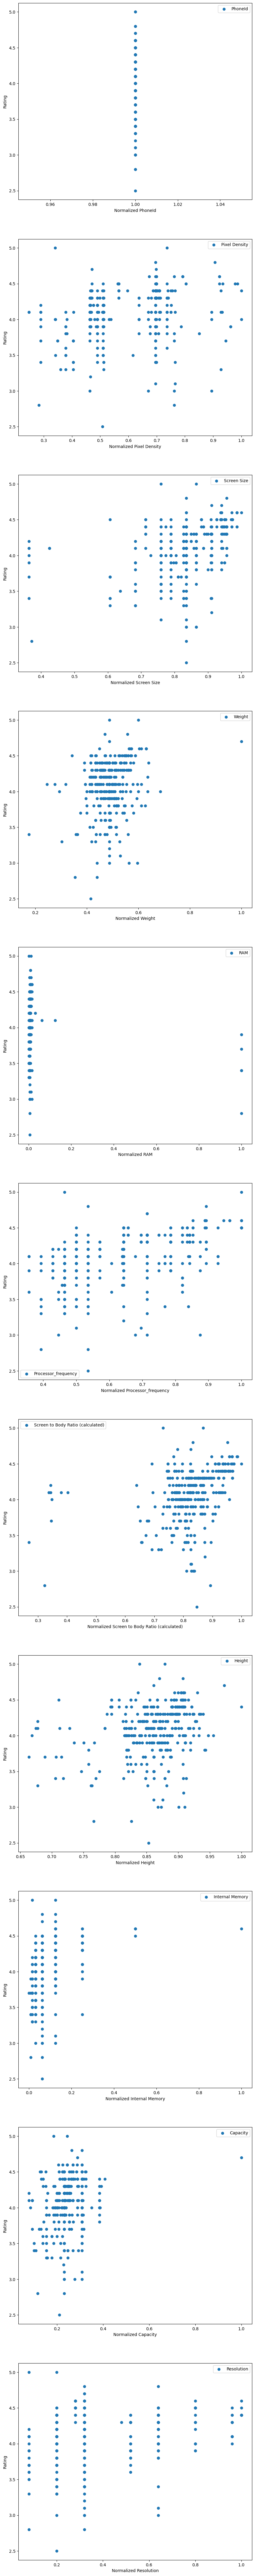

In [11]:
j=0
k=0
fig, axes = plt.subplots(11, figsize=(10,110))
for i in X:
    x = np.array(i)
    y = np.array(rating)
    axes[j].scatter(x, y, label = mobile_data.columns.values[j])
    axes[j].set_xlabel(f"Normalized {mobile_data.columns.values[j]}")
    axes[j].set_ylabel(f"Rating")
    axes[j].legend()

    j+=1

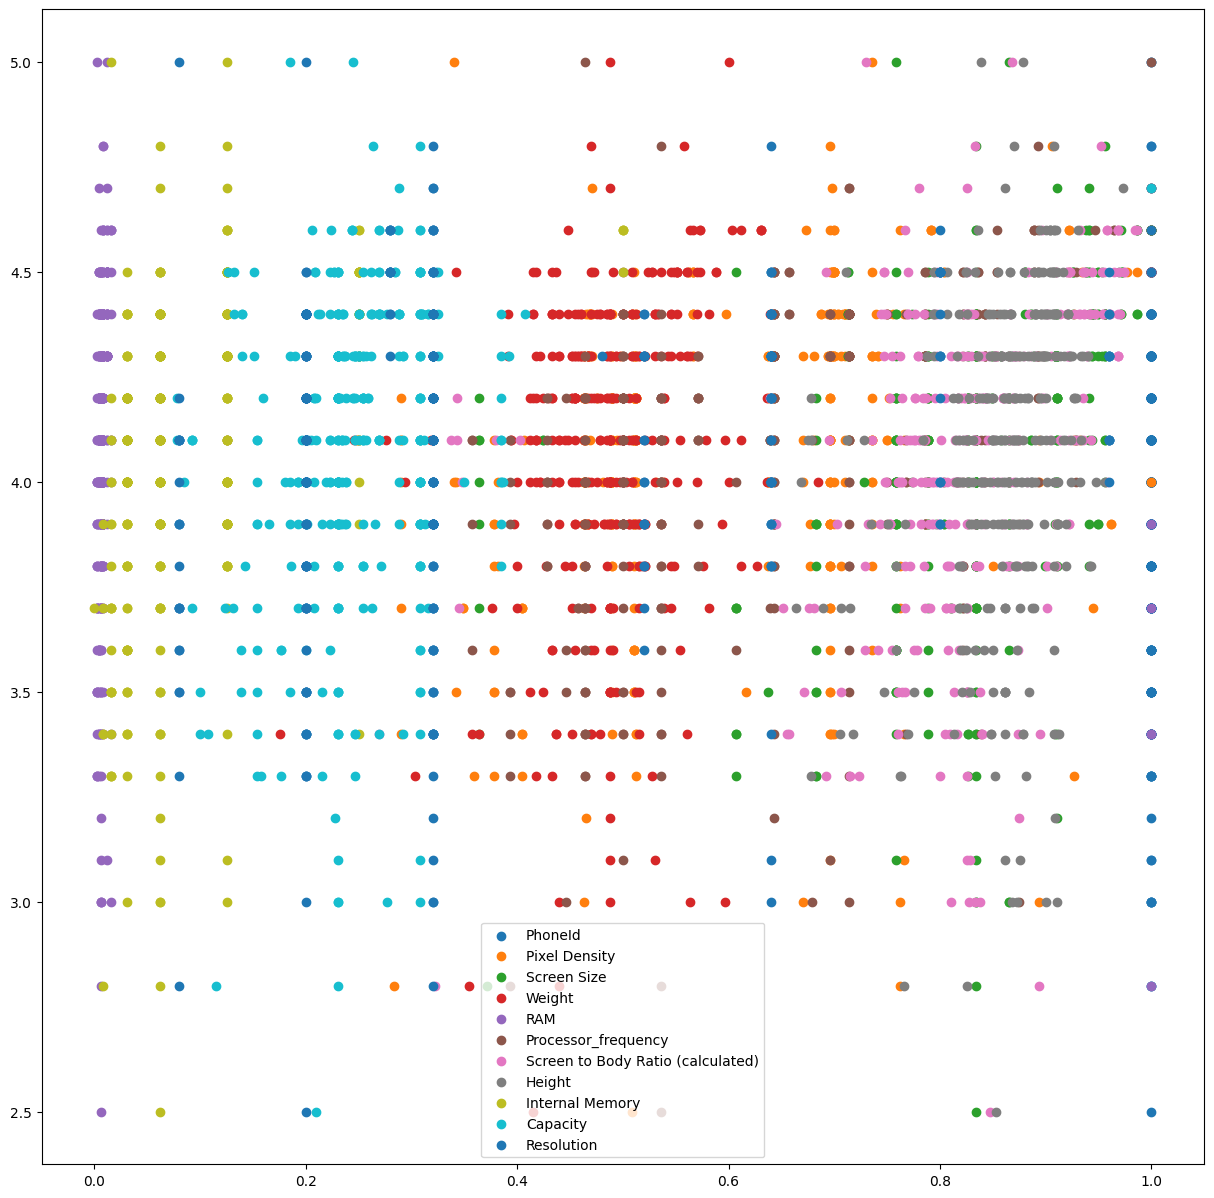

In [9]:
j=0
fig = plt.figure(figsize=(15,15))
ax = fig.subplots(1)
for i in X:

    x = np.array(i)
    y = np.array(rating)
    ax.scatter(x, y, label= mobile_data.columns.values[j])
    ax.legend()
    j+=1
plt.show()


### Based on this I feel that screen size, frequecny of processor, scrren body ratio pixel, density and resolution are the most important details people consider before buying a phone. Phone ID is something that isnt considered at all.

$R^2$ error is used to evaluate the performance of a linear regression model. It uses the sum of residual errors and the sum of total errors to find the value. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). If $R^2$ is 70%, it says about 30% of variability is not accounted by the model, the remaining 30% is accounted for.

$
R^2 = 1-\frac{{SS}_{res}}{{SS}_{tot}}
$

In [10]:
from sklearn.metrics import r2_score
print(f"R2 score for the above model is {r2_score(rating,np.matmul(weight,X))}")

R2 score for the above model is 0.2652744790884811
